**Importando Pacotes**

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pca
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

**Carga de dados**

In [3]:
# carregar dados
dados = pd.read_csv('dados_municipios.csv')

In [4]:
#visualizar dados
dados.head()

,ano,estado,municipio,t_agua,t_banagua,t_lixo,t_luz,T_ANALF18M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED
0,2010,Rondônia,ALTA FLORESTA D'OESTE,93.69,80.20,94.05,93.98,13.00,22.03,17.82,7.79
1,2010,Rondônia,ARIQUEMES,98.54,85.35,96.72,98.58,8.53,19.35,16.74,3.96
2,2010,Rondônia,CABIXI,95.49,91.63,99.14,96.36,14.73,15.59,12.93,6.93
3,2010,Rondônia,CACOAL,97.96,93.44,98.17,98.89,8.94,15.57,12.58,7.33
4,2010,Rondônia,CEREJEIRAS,97.53,86.87,91.89,98.85,11.17,12.93,10.27,3.82


In [10]:
# obter correlacao
colunas_correl = ['t_agua','t_banagua','t_lixo','t_luz','T_ANALF18M','T_ATRASO_2_BASICO','T_ATRASO_2_FUND','T_ATRASO_2_MED']
correlacao = dados[colunas_correl].corr()
# grafico correlacao
correlacao.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-10-d185c85e1774>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlacao.style.background_gradient(cmap='coolwarm').set_precision(2)


,t_agua,t_banagua,t_lixo,t_luz,T_ANALF18M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED
t_agua,1.00,0.72,0.28,0.41,-0.63,-0.54,-0.50,-0.32
t_banagua,0.72,1.00,0.59,0.58,-0.75,-0.69,-0.64,-0.48
t_lixo,0.28,0.59,1.00,0.33,-0.41,-0.39,-0.36,-0.31
t_luz,0.41,0.58,0.33,1.00,-0.36,-0.48,-0.48,-0.31
T_ANALF18M,-0.63,-0.75,-0.41,-0.36,1.00,0.68,0.62,0.45
T_ATRASO_2_BASICO,-0.54,-0.69,-0.39,-0.48,0.68,1.00,0.97,0.61
T_ATRASO_2_FUND,-0.50,-0.64,-0.36,-0.48,0.62,0.97,1.00,0.52
T_ATRASO_2_MED,-0.32,-0.48,-0.31,-0.31,0.45,0.61,0.52,1.00


In [11]:
# separar os dados
cols_pca = ['t_agua', 't_banagua', 't_lixo', 't_luz', 'T_ANALF18M',
'T_ATRASO_2_BASICO','T_ATRASO_2_FUND','T_ATRASO_2_MED']
dados_pca = dados[cols_pca]
# dados filtrados
dados_pca.head()

,t_agua,t_banagua,t_lixo,t_luz,T_ANALF18M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED
0,93.69,80.20,94.05,93.98,13.00,22.03,17.82,7.79
1,98.54,85.35,96.72,98.58,8.53,19.35,16.74,3.96
2,95.49,91.63,99.14,96.36,14.73,15.59,12.93,6.93
3,97.96,93.44,98.17,98.89,8.94,15.57,12.58,7.33
4,97.53,86.87,91.89,98.85,11.17,12.93,10.27,3.82


In [12]:
# normalizar
dados_pca_normalizados = scale(dados_pca)
dados_pca_normalizados.shape
 
# dados ajustados
dados_pca_normalizados

array([[ 5.49726131e-01, -3.09368550e-02,  2.42172576e-04, ...,
         1.05313573e-01,  7.98869347e-02,  4.30400641e-02],
       [ 8.79209721e-01,  2.06275414e-01,  2.41903242e-01, ...,
        -1.81750931e-01, -5.38453800e-02, -6.33085596e-01],
       [ 6.72008701e-01,  4.95536201e-01,  4.60936871e-01, ...,
        -5.84498146e-01, -5.25623268e-01, -1.08779275e-01],
       ...,
       [-2.36432500e-02,  5.78445343e-01,  4.67272554e-01, ...,
        -3.95978173e-01, -6.74214729e-01, -4.53020799e-01],
       [-5.20246352e-01,  4.25524036e-01,  5.38775268e-01, ...,
         2.53130370e-01,  5.21946531e-01, -6.54269690e-01],
       [ 8.51356469e-01,  6.97281781e-01,  4.36499234e-01, ...,
        -5.09518611e-01, -4.17894459e-01,  1.47946057e-02]])

In [13]:
# instanciar o pca
numero_componentes=8
pca=PCA(n_components=numero_componentes)
 
# aplicar o algoritmo nos dados
transformacao_pca=pca.fit_transform(dados_pca_normalizados)

In [16]:
# autovalores
autovalores=pca.explained_variance_
autovalores

array([4.70363134, 0.85335169, 0.75949012, 0.69020576, 0.51875462,
       0.30646742, 0.14775458, 0.02178229])

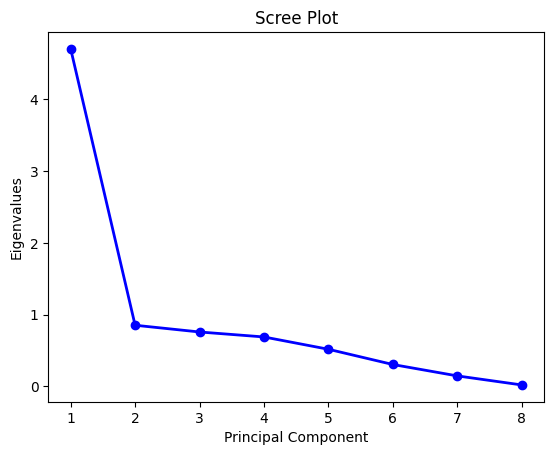

In [17]:
# componentes
n_componentes=np.arange(pca.n_components_)+1
# graficos
plt.plot(n_componentes,autovalores,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

In [18]:
# ve individual
pca.explained_variance_ratio_
# ve acumulada
np.cumsum(pca.explained_variance_ratio_)

array([0.58784827, 0.69449806, 0.78941726, 0.87567748, 0.94051016,
       0.9788117 , 0.9972777 , 1.        ])

In [19]:
# instanciar o pca
numero_componentes=2
pca=PCA(n_components=numero_componentes)
 
# retreinar
pca_retreinado=pca.fit_transform(dados_pca_normalizados)

In [20]:
# instanciar o pca
cargas=pca.components_.T*np.sqrt(pca.explained_variance_)
componentes_cols=['PC'+str(i) for i in range(1,numero_componentes+1)]
df_cargas=pd.DataFrame(cargas,columns=componentes_cols,index=cols_pca)
 
# cargas grafico
df_cargas.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-20-82419a8b33a7>:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_cargas.style.background_gradient(cmap='coolwarm').set_precision(2)


,PC1,PC2
t_agua,-0.73,-0.20
t_banagua,-0.90,-0.28
t_lixo,-0.58,-0.52
t_luz,-0.63,-0.22
T_ANALF18M,0.82,0.05
T_ATRASO_2_BASICO,0.90,-0.34
T_ATRASO_2_FUND,0.86,-0.34
T_ATRASO_2_MED,0.65,-0.42


In [21]:
# instanciar a fa
numero_componentes=2
fa=FactorAnalysis(n_components=numero_componentes,rotation='varimax',svd_method='lapack')
 
# aplicar
transformacao_fa=fa.fit_transform(dados_pca_normalizados)

In [22]:
# cargas
cargas=fa.components_.T
componentes_cols=['PC'+str(i) for i in range(1, numero_componentes+1)]
df_cargas=pd.DataFrame(cargas, columns=componentes_cols, index=cols_pca)
# cargas grafico
df_cargas.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-22-3dcb2002c48d>:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_cargas.style.background_gradient(cmap='coolwarm').set_precision(2)


,PC1,PC2
t_agua,-0.35,0.63
t_banagua,-0.42,0.91
t_lixo,-0.22,0.55
t_luz,-0.34,0.48
T_ANALF18M,0.52,-0.59
T_ATRASO_2_BASICO,0.94,-0.33
T_ATRASO_2_FUND,0.93,-0.28
T_ATRASO_2_MED,0.55,-0.27


In [24]:
# adicionar dados
dados[['PC1','PC2']]=transformacao_fa

In [26]:
dados.head()

,ano,estado,municipio,t_agua,t_banagua,t_lixo,t_luz,T_ANALF18M,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED,PC1,PC2
0,2010,Rondônia,ALTA FLORESTA D'OESTE,93.69,80.20,94.05,93.98,13.00,22.03,17.82,7.79,0.119588,0.024335
1,2010,Rondônia,ARIQUEMES,98.54,85.35,96.72,98.58,8.53,19.35,16.74,3.96,-0.130501,0.175610
2,2010,Rondônia,CABIXI,95.49,91.63,99.14,96.36,14.73,15.59,12.93,6.93,-0.509281,0.311938
3,2010,Rondônia,CACOAL,97.96,93.44,98.17,98.89,8.94,15.57,12.58,7.33,-0.473412,0.423055
4,2010,Rondônia,CEREJEIRAS,97.53,86.87,91.89,98.85,11.17,12.93,10.27,3.82,-0.967843,-0.133792
